## Notebook17a

In [28]:
! wget -q -nc https://raw.githubusercontent.com/taylor-arnold/fds-py/refs/heads/main/funs.py

In [29]:
import numpy as np
import polars as pl

from funs import *
from plotnine import *
from polars import col as c
theme_set(theme_minimal())

ub = "https://raw.githubusercontent.com/taylor-arnold/fds-py-nb/refs/heads/main/"

### Reading the Data

In [30]:
covid = pl.read_csv(ub + "data/it_province_covid.csv").with_columns(
    date = c.date.str.to_date()
)
covid

shape: (68_694, 4)
┌────────────┬────────────┬──────────┬───────┐
│ date       ┆ region     ┆ province ┆ cases │
│ ---        ┆ ---        ┆ ---      ┆ ---   │
│ date       ┆ str        ┆ str      ┆ i64   │
╞════════════╪════════════╪══════════╪═══════╡
│ 2020-02-24 ┆ Abruzzo    ┆ L'Aquila ┆ 0     │
│ 2020-02-24 ┆ Abruzzo    ┆ Teramo   ┆ 0     │
│ 2020-02-24 ┆ Abruzzo    ┆ Pescara  ┆ 0     │
│ 2020-02-24 ┆ Abruzzo    ┆ Chieti   ┆ 0     │
│ 2020-02-24 ┆ Basilicata ┆ Potenza  ┆ 0     │
│ …          ┆ …          ┆ …        ┆ …     │
│ 2021-11-26 ┆ Veneto     ┆ Belluno  ┆ 48    │
│ 2021-11-26 ┆ Veneto     ┆ Treviso  ┆ 424   │
│ 2021-11-26 ┆ Veneto     ┆ Venezia  ┆ 390   │
│ 2021-11-26 ┆ Veneto     ┆ Padova   ┆ 430   │
│ 2021-11-26 ┆ Veneto     ┆ Rovigo   ┆ 80    │
└────────────┴────────────┴──────────┴───────┘

In [31]:
prov = DSGeo.read_file(ub + "data/it_province.geojson")
prov

shape: (107, 2)
┌──────────────┬─────────────────────────────────┐
│ province     ┆ geometry                        │
│ ---          ┆ ---                             │
│ str          ┆ binary                          │
╞══════════════╪═════════════════════════════════╡
│ Torino       ┆ b"\x01\x06\x00\x00\x00\x01\x00… │
│ Vercelli     ┆ b"\x01\x06\x00\x00\x00\x01\x00… │
│ Novara       ┆ b"\x01\x06\x00\x00\x00\x01\x00… │
│ Cuneo        ┆ b"\x01\x06\x00\x00\x00\x02\x00… │
│ Asti         ┆ b"\x01\x06\x00\x00\x00\x01\x00… │
│ …            ┆ …                               │
│ Sassari      ┆ b"\x01\x06\x00\x00\x00|\x00\x0… │
│ Nuoro        ┆ b"\x01\x06\x00\x00\x00\x05\x00… │
│ Cagliari     ┆ b"\x01\x06\x00\x00\x00\x03\x00… │
│ Oristano     ┆ b"\x01\x06\x00\x00\x00\x0a\x00… │
│ Sud Sardegna ┆ b"\x01\x06\x00\x00\x00\x20\x00… │
└──────────────┴─────────────────────────────────┘

In [32]:
it_city = pl.read_csv(ub + "data/it_cities.csv")
it_city = DSGeo.from_latlon(it_city)
it_city

shape: (388, 5)
┌─────────────────────┬──────────┬──────────┬─────────┬─────────────────────────────────┐
│ city_name           ┆ lon      ┆ lat      ┆ pop     ┆ geometry                        │
│ ---                 ┆ ---      ┆ ---      ┆ ---     ┆ ---                             │
│ str                 ┆ f64      ┆ f64      ┆ i64     ┆ binary                          │
╞═════════════════════╪══════════╪══════════╪═════════╪═════════════════════════════════╡
│ Rome                ┆ 12.51133 ┆ 41.89193 ┆ 2318895 ┆ b"\x01\x01\x00\x00\x00g\xed\xb… │
│ Milan               ┆ 9.18951  ┆ 45.46427 ┆ 1236837 ┆ b"\x01\x01\x00\x00\x00\xa9\x87… │
│ Naples              ┆ 14.26811 ┆ 40.85216 ┆ 959470  ┆ b"\x01\x01\x00\x00\x00\x0cv\xc… │
│ Turin               ┆ 7.68682  ┆ 45.07049 ┆ 870456  ┆ b"\x01\x01\x00\x00\x00s\xf4\xf… │
│ Palermo             ┆ 13.33561 ┆ 38.13205 ┆ 648260  ┆ b"\x01\x01\x00\x00\x00\xcfk\xe… │
│ …                   ┆ …        ┆ …        ┆ …       ┆ …                               │
│ Thiene              ┆ 11.47959 ┆ 45.7088  ┆ 21145   ┆ b"\x01\x01\x00\x00\x00/\xfa\x0… │
│ Francavilla al Mare ┆ 14.28217 ┆ 42.42158 ┆ 21095   ┆ b"\x01\x01\x00\x00\x00\x1c\xd3… │
│ Sulmona             ┆ 13.92578 ┆ 42.04945 ┆ 21086   ┆ b"\x01\x01\x00\x00\x00\xee\x94… │
│ Cassino             ┆ 13.82835 ┆ 41.48581 ┆ 21074   ┆ b"\x01\x01\x00\x00\x00\x80H\xb… │
│ Guidonia            ┆ 12.71876 ┆ 41.99232 ┆ 20943   ┆ b"\x01\x01\x00\x00\x00\x8eX\x8… │
└─────────────────────┴──────────┴──────────┴─────────┴─────────────────────────────────┘

**Research Questions**: How did the reported number of COVID-19 infections in Italy change over time and by region? How can we predict a spike in infections?

### Questions

1. Create a line plot of the number of COVID-19 cases in the province of Verona. Label the plot with one label per month, using only the year and month as the label.

/usr/local/lib/python3.12/dist-packages/mizani/breaks.py:448: FutureWarning: Passing the width as the parameter has been deprecated and will not work in a future version. Use breaks_date(width="4 years")


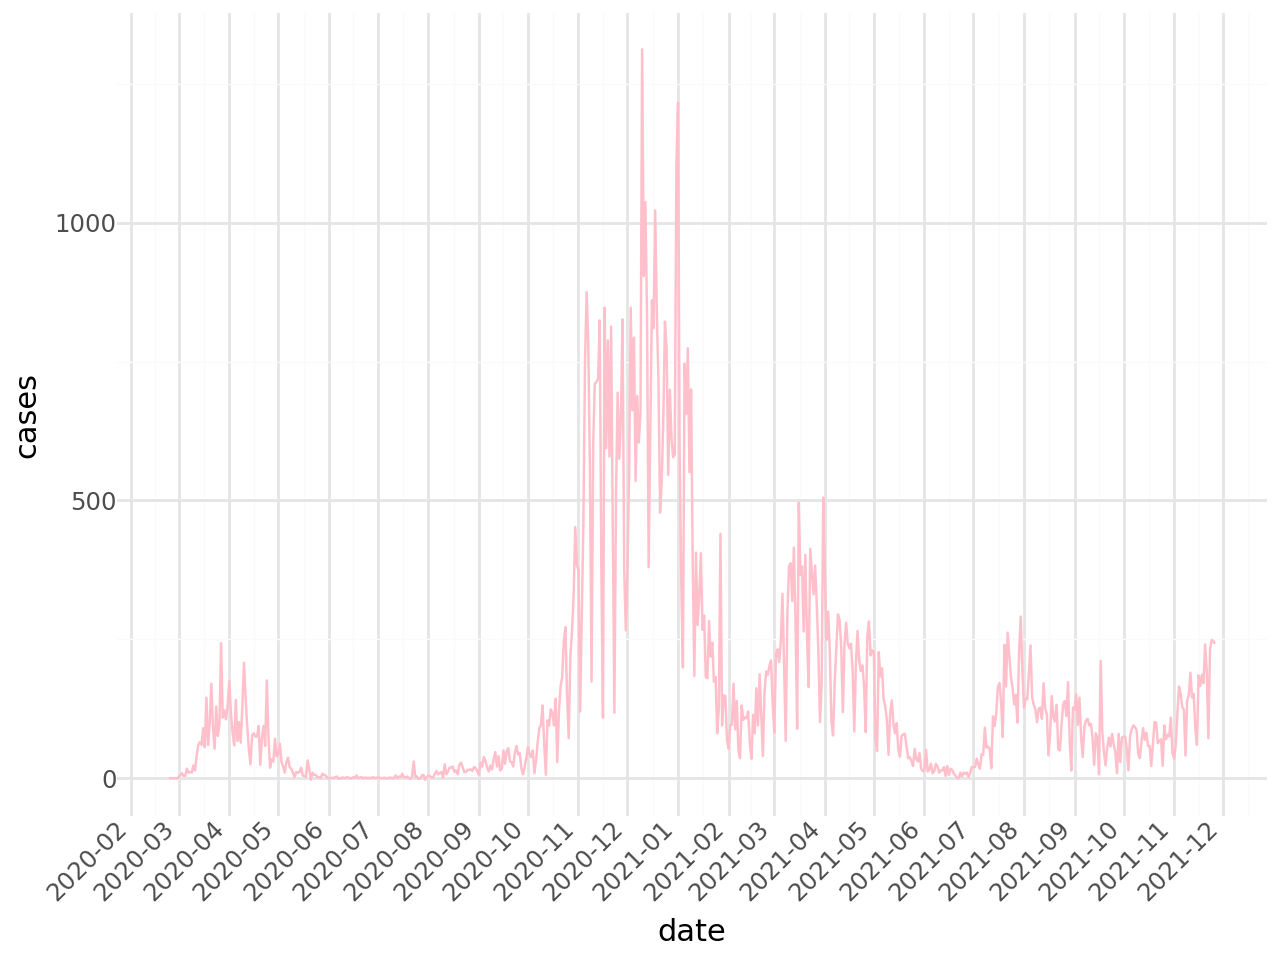

In [33]:
(
    covid
    .filter(c.province == "Verona")
    .pipe(ggplot, aes("date","cases"))
    + geom_line(color="pink")
    + scale_x_date(date_breaks="1 month", date_labels="%Y-%m")
    + theme(axis_text_x=element_text(angle=45, hjust=1))
)

2. Recreate the plot you made in the previous question, filtering the data to contain only the points before 1 June 2020. This is the first wave of the pandemic following local and global social distancing rules and shows the initial peak followed by slow but continual decrease in cases through the spring.

/usr/local/lib/python3.12/dist-packages/mizani/breaks.py:448: FutureWarning: Passing the width as the parameter has been deprecated and will not work in a future version. Use breaks_date(width="4 years")


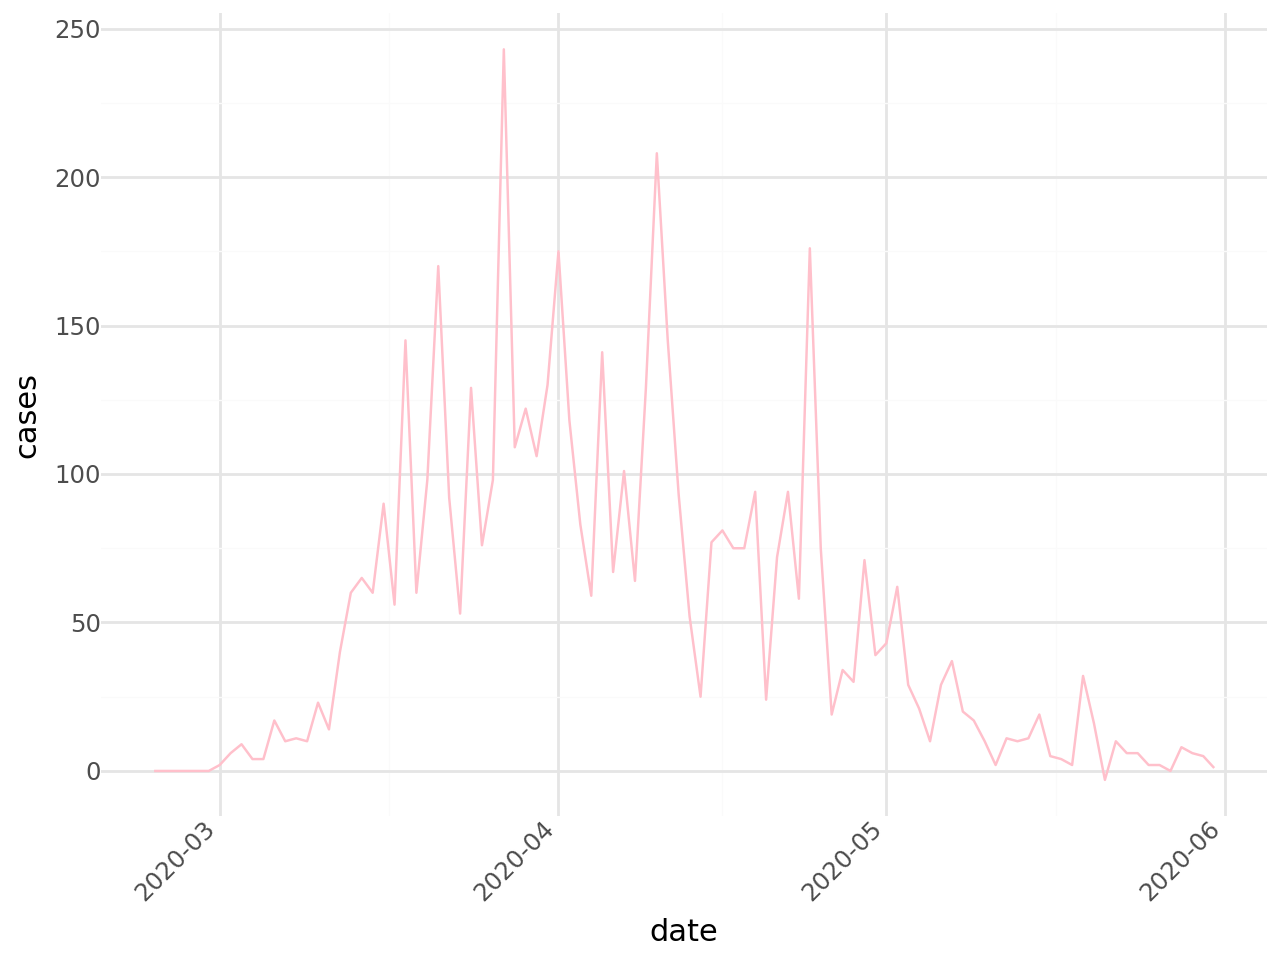

In [34]:
(
    covid
    .filter(c.province == "Verona")
    .filter(c.date < pl.date(2020, 6, 1))
    .pipe(ggplot, aes("date","cases"))
    + geom_line(color="pink")
    + scale_x_date(date_breaks="1 month", date_labels="%Y-%m")
    + theme(axis_text_x=element_text(angle=45, hjust=1))
)

3. The daily cases are noisy. Truncate the date data at the weekly level, then group the data by week and compute the total number of cases over the week. Plot the data as you did in the first questions, using all of the data (not just the first six months).

/usr/local/lib/python3.12/dist-packages/mizani/breaks.py:448: FutureWarning: Passing the width as the parameter has been deprecated and will not work in a future version. Use breaks_date(width="4 years")


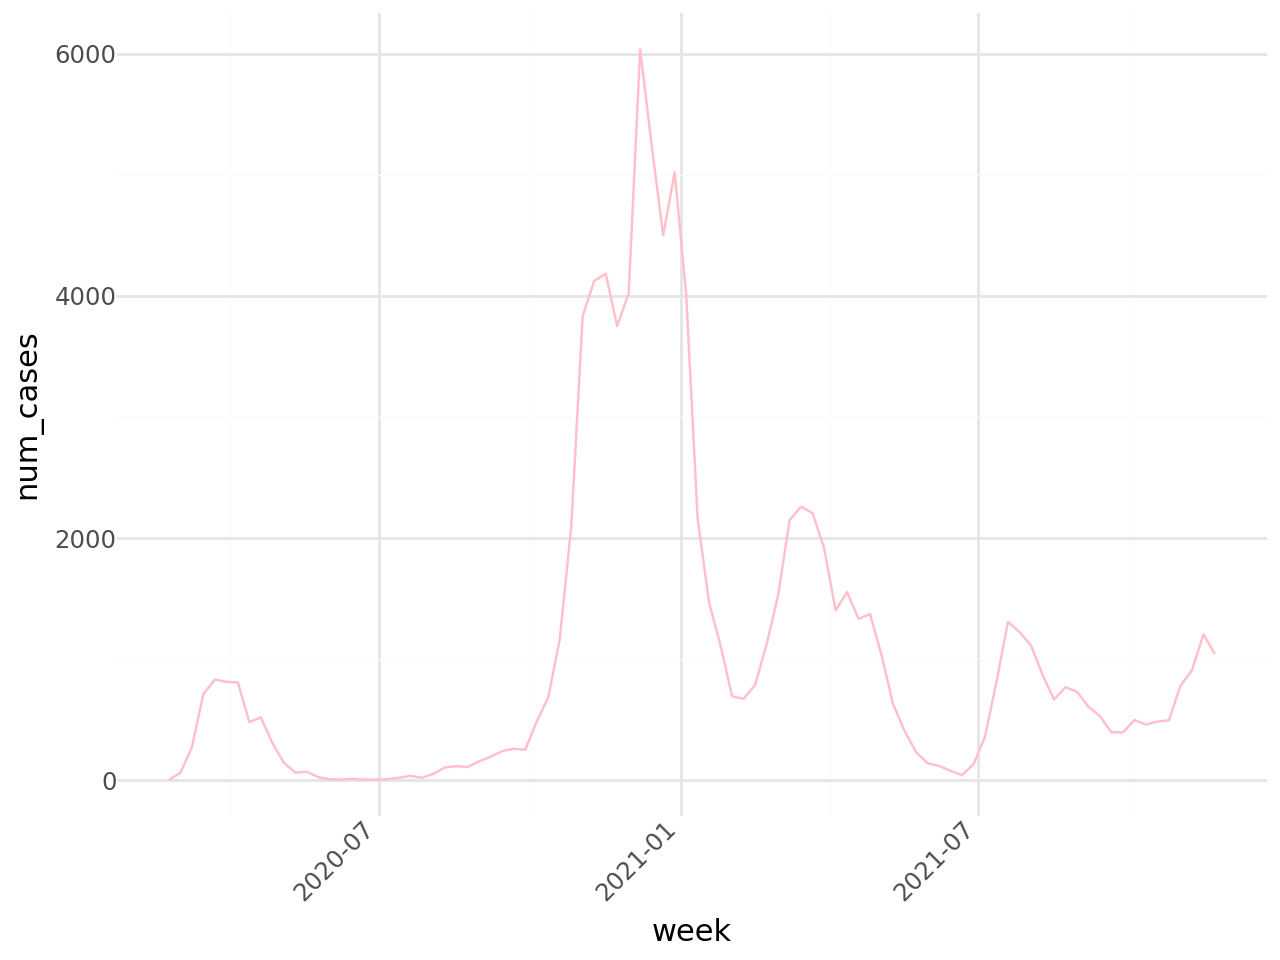

In [35]:
(
    covid
    .filter(c.province == "Verona")
    .with_columns(
        week = c.date.dt.truncate("1w")
    )
    .group_by(c.week)
    .agg(
        num_cases = c.cases.sum()
    )
    .pipe(ggplot, aes("week","num_cases"))
    + geom_line(color="pink")
    + scale_x_date(date_breaks="6 months", date_labels="%Y-%m")
    + theme(axis_text_x=element_text(angle=45, hjust=1))
)

4. Next, let's look at all of the provinces in the entire Veneto region. Repeat what you did in the previous question, but now include all provinces in Veneto. Create a line plot that shows the number of cases within each province, using color to differentiate the provinces.

/usr/local/lib/python3.12/dist-packages/mizani/breaks.py:448: FutureWarning: Passing the width as the parameter has been deprecated and will not work in a future version. Use breaks_date(width="4 years")


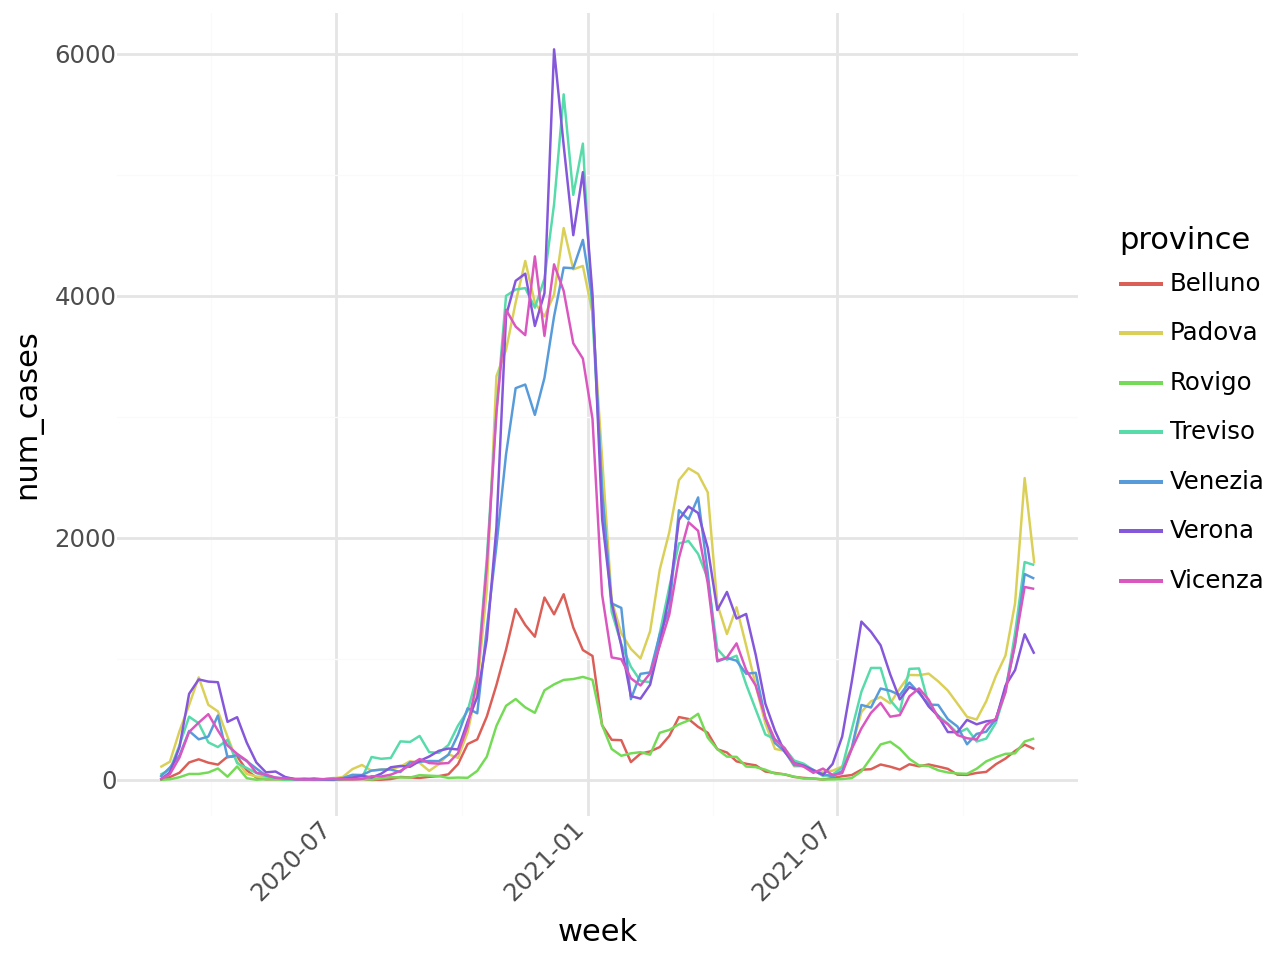

In [36]:
(
    covid
    .filter(c.region == "Veneto")
    .with_columns(
        week = c.date.dt.truncate("1w")
    )
    .group_by(c.week, c.province)
    .agg(
        num_cases = c.cases.sum()
    )
    .pipe(ggplot, aes("week","num_cases"))
    + geom_line(aes(color="province"))
    + scale_x_date(date_breaks="6 months", date_labels="%Y-%m")
    + theme(axis_text_x=element_text(angle=45, hjust=1))
)

5. A problem in the previous plot is that we are plotting the raw cases, but some provinces are larger than others, and what really matters is the rate of cases. To get the rate we need the population of each province. Rather than giving that directly to you (in this case it's easy to find, but in many others we would need to compute it from another dataset), we are going to calculate the population by doing the following: doing a spatial join of `it_city` into `prov`, grouping the output by province, and that summing up the population for each province. When you are confident with the output, save the result as a dataset called `prov_pop`.

/usr/local/lib/python3.12/dist-packages/mizani/breaks.py:448: FutureWarning: Passing the width as the parameter has been deprecated and will not work in a future version. Use breaks_date(width="4 years")


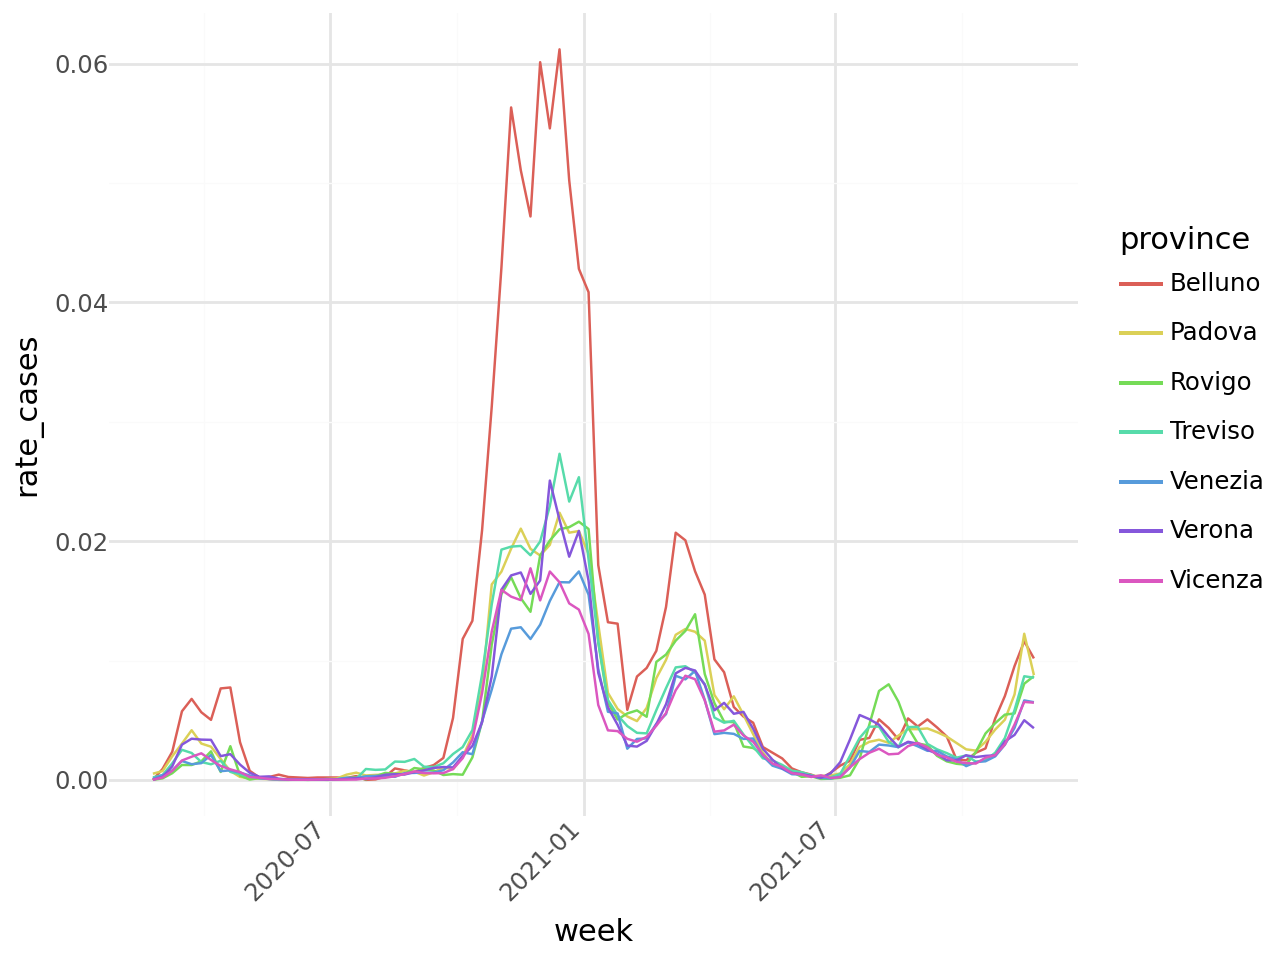

In [37]:
prov_pop = (
    DSGeo.sjoin(it_city, prov)
    .group_by(c.province)
    .agg(
        total_pop = c.pop.sum()
    )
)
(
    covid
    .filter(c.region == "Veneto")
    .with_columns(
        week = c.date.dt.truncate("1w")
    )
    .group_by(c.week, c.province)
    .agg(
        num_cases = c.cases.sum()
    )
    .join(prov_pop, on="province")
    .with_columns(
        rate_cases = (c.num_cases / c.total_pop)
    )
    .pipe(ggplot, aes("week","rate_cases"))
    + geom_line(aes(color="province"))
    + scale_x_date(date_breaks="6 months", date_labels="%Y-%m")
    + theme(axis_text_x=element_text(angle=45, hjust=1))
)

6. Now, repeat what you did in question 4, but now before plotting, join the data to the `prov_pop` dataset and compute the number of cases per 100k people. Plot this rate instead of the raw cases. You should see that the rate evens out, with a single outlier (I'm not sure what's going on with this one province, but it's likely some combination of both a real spike and an issue with our population count, which only includes larger towns and cities).

/usr/local/lib/python3.12/dist-packages/mizani/breaks.py:448: FutureWarning: Passing the width as the parameter has been deprecated and will not work in a future version. Use breaks_date(width="4 years")


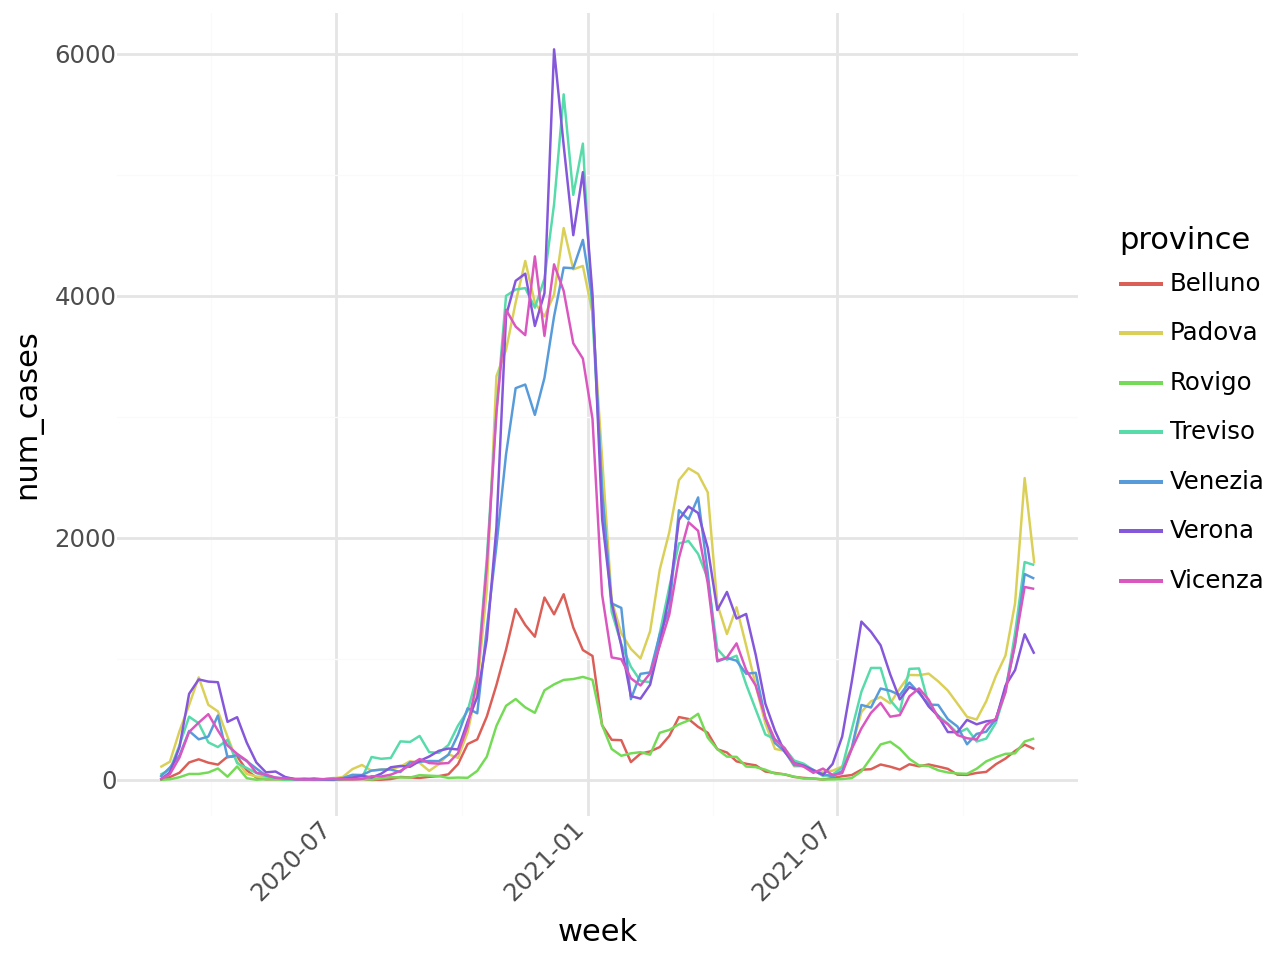

In [40]:
(
    covid
    .filter(c.region == "Veneto")
    .with_columns(
        week = c.date.dt.truncate("1w")
    )
    .group_by(c.week, c.province)
    .agg(
        num_cases = c.cases.sum()
    )
    .join(prov_pop, on="province")
    .with_columns(
        rate = c.num_cases / c.total_pop * 100_000
    )
    .pipe(ggplot, aes("week","num_cases"))
    + geom_line(aes(color="province"))
    + scale_x_date(date_breaks="6 months", date_labels="%Y-%m")
    + theme(axis_text_x=element_text(angle=45, hjust=1))
)

7. Let's now look at the entire country at a particular moment in time. To make the plots easier to filter, replace the week truncation function you used above with the `c.date.dt.week()` function, which returns an integer of the week. For each province and week, compute the number of cases per 100k people. Then, filter the data to only include week number 12 and use `DSGeo.plot` with the `color_by` parameter set to the rate variable you created.

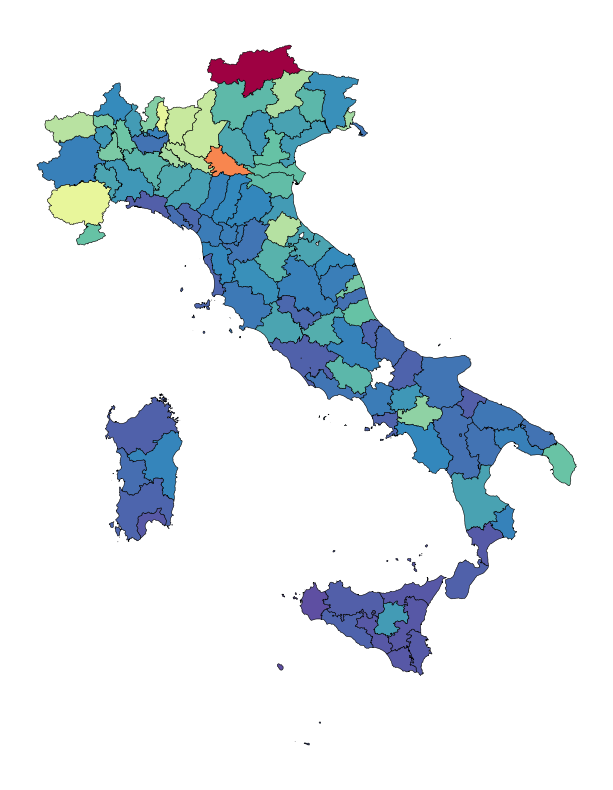

<Axes: >

In [42]:
(
    covid
    .with_columns(
        week = c.date.dt.week()
    )
    .group_by(c.province, c.week)
    .agg(
        num_cases = c.cases.sum()
    )
    .join(prov_pop, on=c.province)
    .with_columns(
        rate = c.num_cases / c.total_pop * 100_000
    )
    .filter(c.week == 12)
    .join(prov, on=c.province)
    .pipe(DSGeo.plot, color_by=c.rate)
)

8. Repeat the previous question for week 13. Compare the two plots visually.

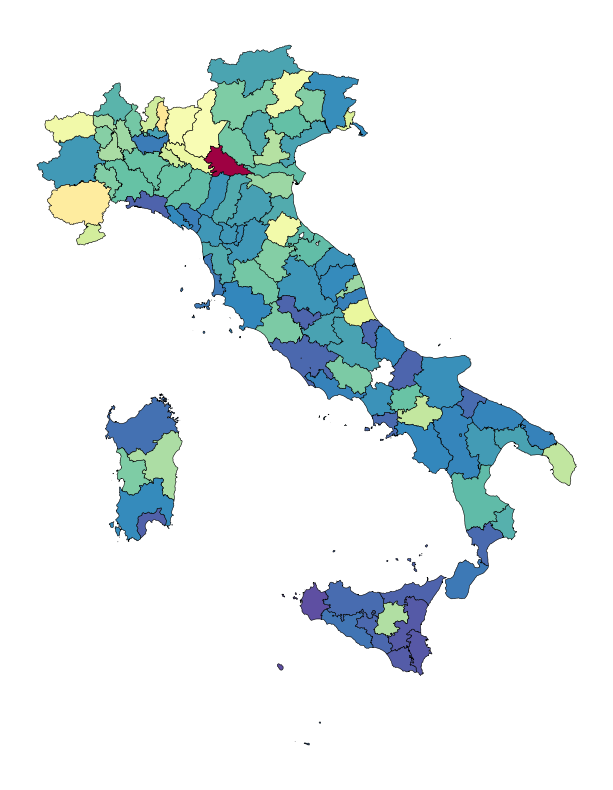

<Axes: >

In [43]:
(
    covid
    .with_columns(
        week = c.date.dt.week()
    )
    .group_by(c.province, c.week)
    .agg(
        num_cases = c.cases.sum()
    )
    .join(prov_pop, on=c.province)
    .with_columns(
        rate = c.num_cases / c.total_pop * 100_000
    )
    .filter(c.week == 13)
    .join(prov, on=c.province)
    .pipe(DSGeo.plot, color_by=c.rate)
)

9. In this last question, I have written the code for you. Your job is just to run it and evaluate what's going on. This is code to create a moving visualization of data, something that I don't generally find particularly useful in most cases, but has a lot of utility when working with spatio-temporal data (data that has both spatial and temporal dimensions) because there is no way to show both fully on the same static plot, even with the aid of color. If for some reason you have trouble getting this to run, please look at the solutions for an itneractive version.

2021-01-04
2021-01-04
2021-01-11
2021-01-18
2021-01-25
2021-02-01
2021-02-08
2021-02-15
2021-02-22
2020-02-24
2020-03-02
2020-03-09
2020-03-16
2020-03-23
2020-03-30
2020-04-06
2020-04-13
2020-04-20
2020-04-27
2020-05-04
2020-05-11
2020-05-18
2020-05-25
2020-06-01
2020-06-08
2020-06-15
2020-06-22
2020-06-29
2020-07-06
2020-07-13
2020-07-20
2020-07-27
2020-08-03
2020-08-10
2020-08-17
2020-08-24
2020-08-31
2020-09-07
2020-09-14
2020-09-21
2020-09-28
2020-10-05
2020-10-12
2020-10-19
2020-10-26
2020-11-02
2020-11-09
2020-11-16
2020-11-23
2020-11-30
2020-12-07
2020-12-14


2021-01-04


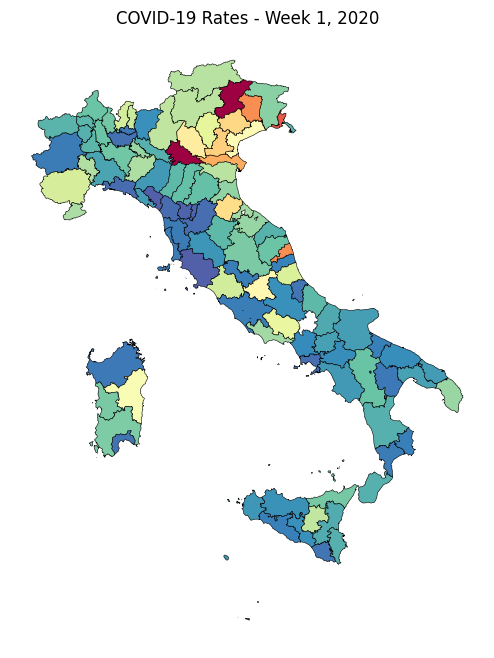

In [45]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(10, 8))

def update(week_num):
    ax.clear()

    frame_data = (
        covid
        .with_columns(week = c.date.dt.week())
        .group_by(c.province, c.week)
        .agg(cases = c.cases.sum(), date = c.date.min())
        .join(prov_pop, on=c.province)
        .with_columns(rate = c.cases / c.total_pop * 100_000)
        .filter(c.week == week_num)
        .join(prov, on=c.province)
    )

    print(frame_data['date'].first())

    DSGeo.plot(frame_data, color_by=c.rate, ax=ax, show=False, vmin=0, vmax=3000)
    ax.set_title(f"COVID-19 Rates - Week {week_num}, 2020")

ani = FuncAnimation(fig, update, frames=list(range(1,52)), interval=50)
HTML(ani.to_jshtml())